In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
plt.ion()

import sys
sys.path.append('../../')
import logomaker

In [14]:
# Set names of matrix files
ww_mat_file = 'ww_info_matrix.txt'
ss_mat_file = 'ss_prob_matrix.txt'
crp_mat_file = 'crp_energy_matrix.txt'
ars_mat_file = 'ars_weight_matrix.txt'
saliency_mat_file = 'saliency_matrix.txt'

WW domain matrix creation done. Matrix saved as ww_info_matrix.txt.


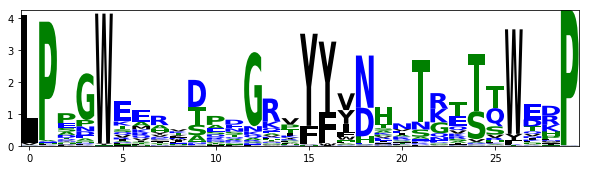

In [13]:
### Create WW domain information matrix

# Load alignment of WW domain proteins
in_file = 'Pfam_wwdomain.fa'
with open(in_file, 'r') as f:
    text = f.read()
    lines = text.split('\n')
    seqs = [l.strip().upper() for l in lines if '#' not in l and '>' not in l and len(l.strip())>0]
    
# Create counts matrix
counts_df = logomaker.alignment_to_matrix(seqs,characters_to_ignore='.-X')

# Filter base on counts
num_seqs = counts_df.sum(axis=1)
pos_to_keep = num_seqs > len(seqs)/2
counts_df = counts_df[pos_to_keep]
counts_df.reset_index(drop=True, inplace=True)

# Transform to information matrix
info_df = logomaker.transform_matrix(counts_df, from_type='counts', to_type='information')

# Display information matrix
logomaker.Logo(info_df)

# Save file
info_df.to_csv(ww_mat_file, sep='\t')
print('WW domain matrix creation done. Matrix saved as %s.'%ww_mat_file)

splice site probability matrix creation done. Matrix saved as ss_prob_matrix.txt.


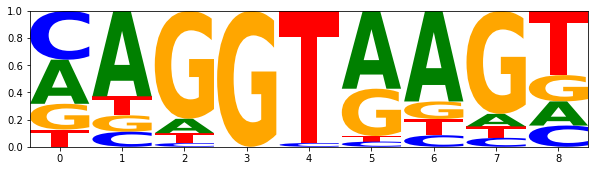

In [16]:
# Create splice site probability matrix

# Load all splice sites
df = pd.read_csv('hg38_sss.txt', sep='\t', index_col=0)
df.head()

# Get 5' splice sites
seqs = df['ss5_seq'].copy()
indices = [s[3]=='G' and s[4] in 'TC' for s in seqs]
seqs = list(seqs[indices])

# Compute probability matrix from sequence alignment
prob_df = logomaker.alignment_to_matrix(seqs, to_type='probability', pseudocount=0)

# Display probability matrix
logo = logomaker.Logo(prob_df)

# Save file
info_df.to_csv(ss_mat_file, sep='\t')
print('splice site probability matrix creation done. Matrix saved as %s.'%ss_mat_file)